# Los Angeles Crime

In [1]:
# Import libraries and data
import pandas as pd
import seaborn as sns
from datetime import datetime as datetime
import matplotlib.pyplot as plt

In [2]:
# Loading the data

data = pd.read_csv('data/crimes.csv')
print(data.info())
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB
None
       DR_NO   Date Rptd    DATE OCC  TIME OCC    AREA NAME  \
0  220314085  2022-07-22  2020-05-12      1110    Southwest   
1  222013040  2022-08-06  2020-06-04      1620      Olympic   
2  220614831  2022-08-18  2020-08-17      

In [3]:
# Data cleaning
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])
data.rename(columns={'DR_NO': 'Recordnumber',
                     'Date Rptd': 'DateCrimeReported', 
                     'DATE OCC': 'DateCrimeOccurred', 
                     'Crm Cd Desc': 'CrimeCommitted',
                     'TIME OCC': 'TimeOccurred',
                     'LOCATION': 'Location',
                     'AREA NAME': 'AreaName',
                     'Vict Age': 'VictAge',
                     'Vict Sex': 'VictSex',
                     'Vict Descent': 'VictRace',
                     'Weapon Desc': 'Weapon',
                     'Status Desc': 'Status'}, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Recordnumber       185715 non-null  int64         
 1   DateCrimeReported  185715 non-null  datetime64[ns]
 2   DateCrimeOccurred  185715 non-null  datetime64[ns]
 3   TimeOccurred       185715 non-null  int64         
 4   AreaName           185715 non-null  object        
 5   CrimeCommitted     185715 non-null  object        
 6   VictAge            185715 non-null  int64         
 7   VictSex            185704 non-null  object        
 8   VictRace           185705 non-null  object        
 9   Weapon             73502 non-null   object        
 10  Status             185715 non-null  object        
 11  Location           185715 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 17.0+ MB
None


/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


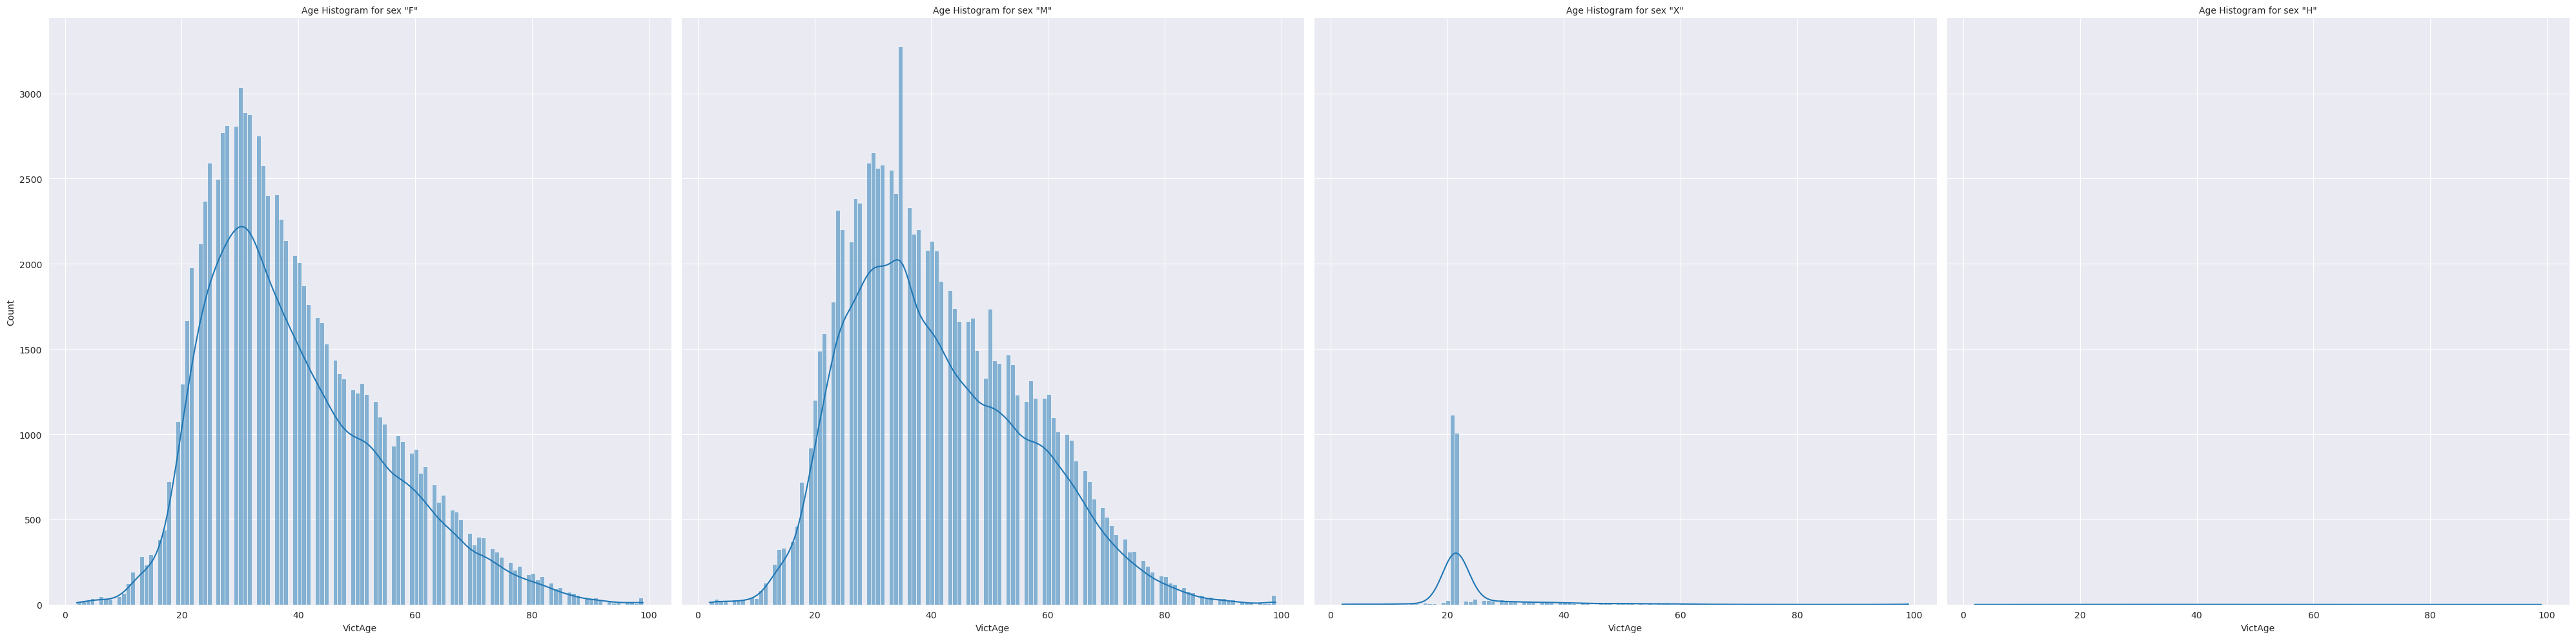

In [4]:
# Data plotting and exploring
h = sns.displot(data=data, x='VictAge', kind='hist', kde=True, col='VictSex', aspect=1, height=10)
h.set_titles('Age Histogram for sex "{col_name}"')

In [5]:
print(f'{data["AreaName"].nunique()} areas')
print(f'{data["Location"].nunique()} locations')
print(f'{data["VictRace"].nunique()} victim race types')
print(f'{data["CrimeCommitted"].nunique()} crime types')
print(f'{data["Weapon"].nunique()} weapon types')
print(f'{data["Status"].nunique()} possible case status')

21 areas
39286 locations
20 victim race types
104 crime types
74 weapon types
6 possible case status


/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


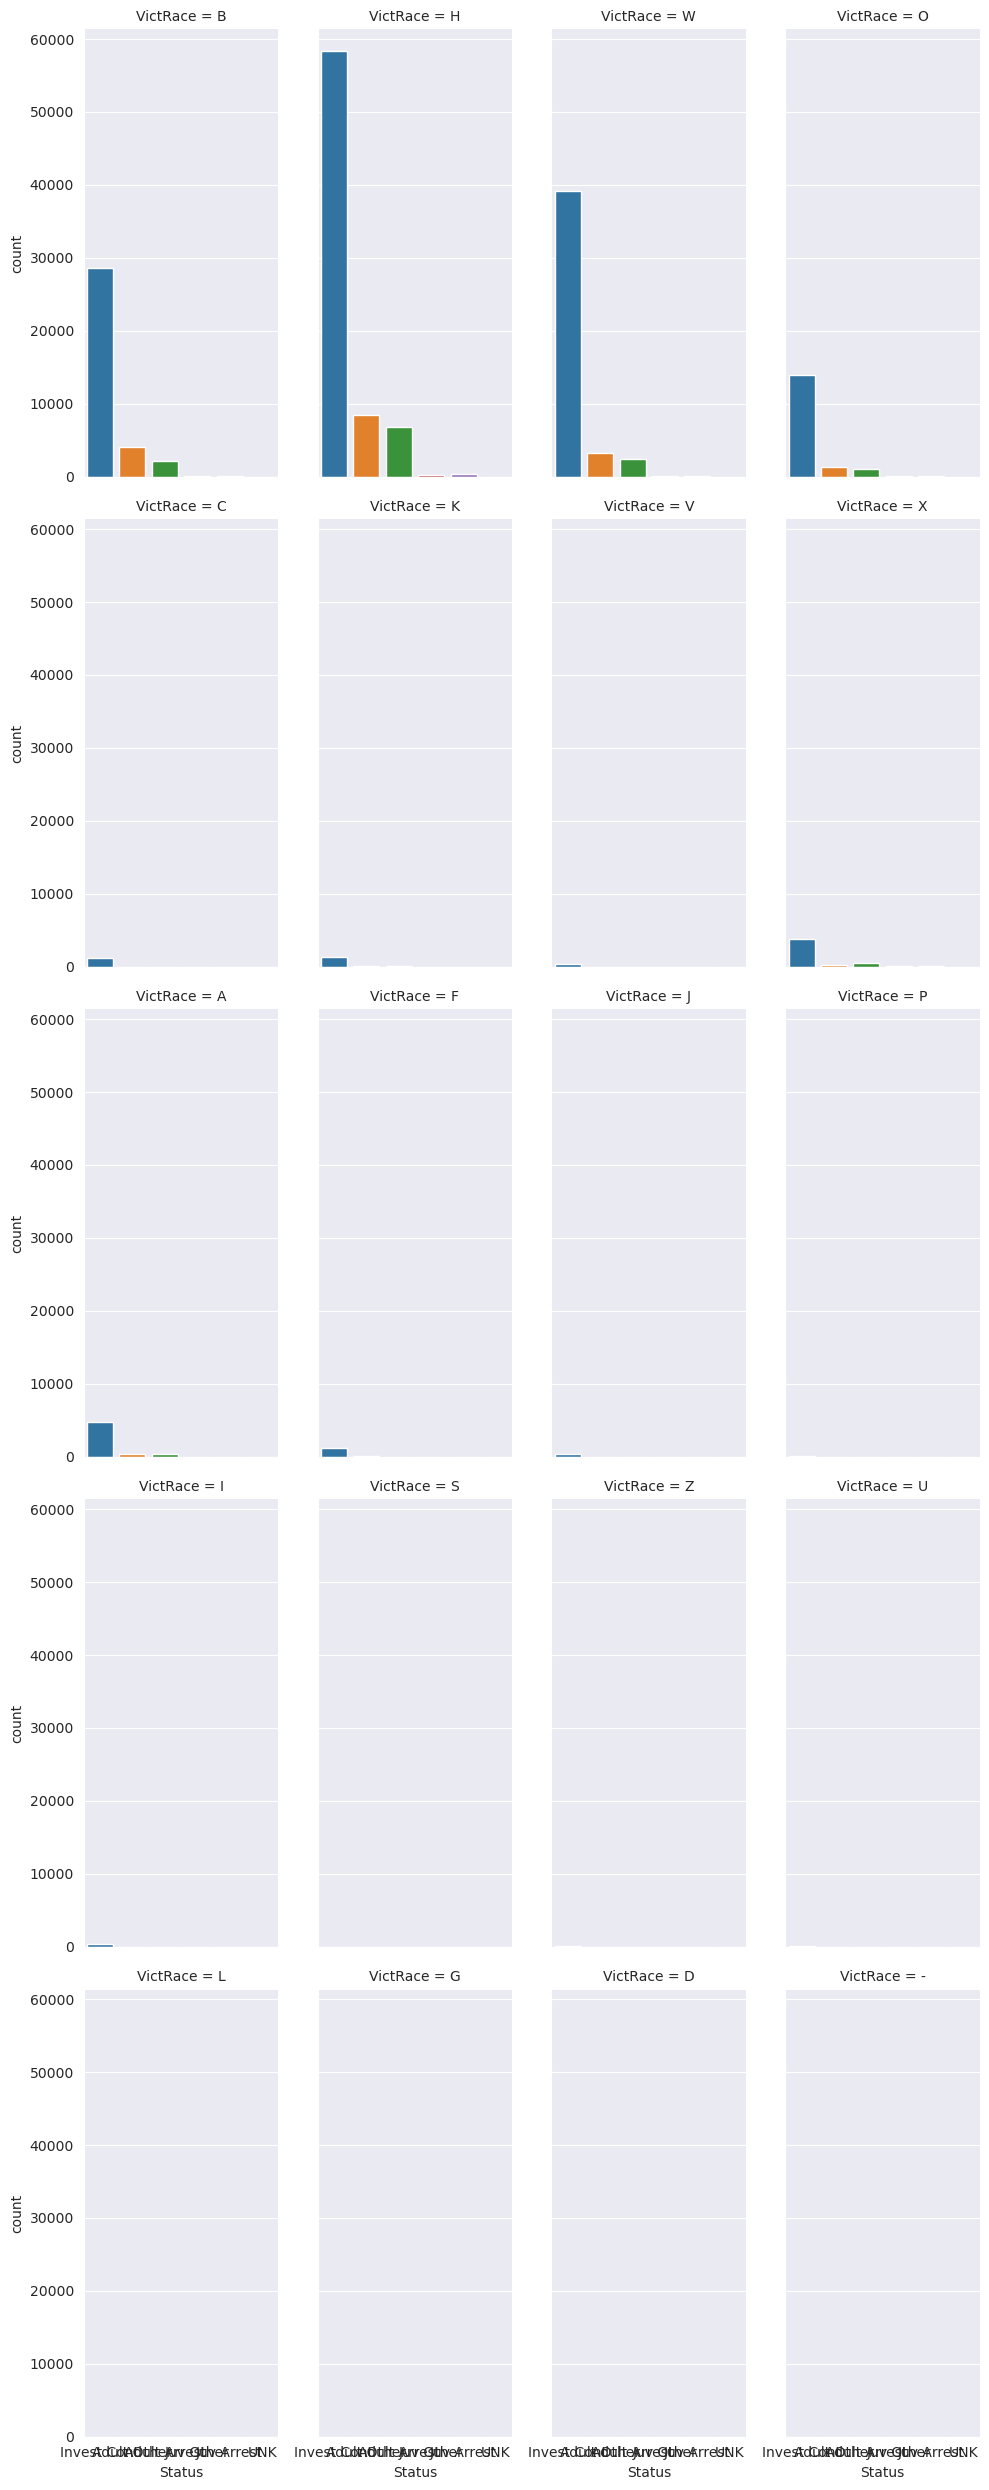

In [6]:
sns.set_style('darkgrid')
sns.color_palette('coolwarm')
sns.catplot(data=data, x='Status', kind='count', col='VictRace', col_wrap=4, aspect=0.5, height=5, legend='full')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


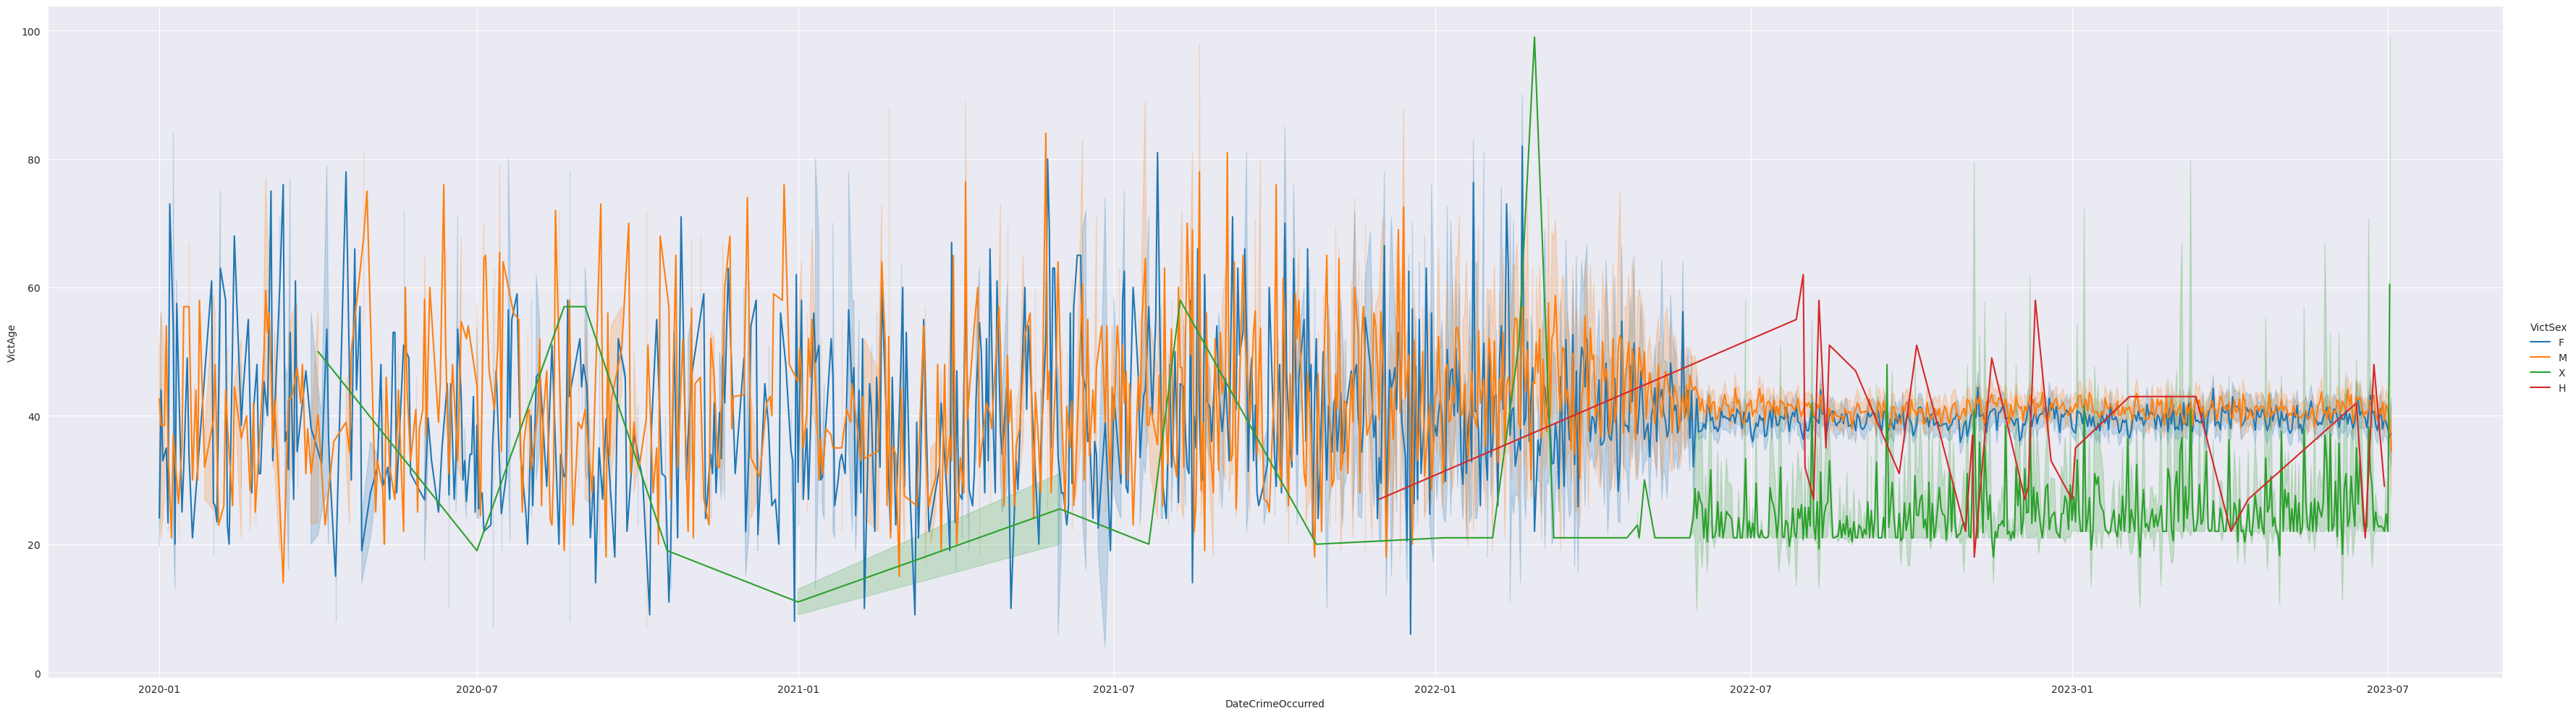

In [7]:
sns.relplot(data=data, x='DateCrimeOccurred', y='VictAge', kind='line', hue='VictSex', height=10, aspect=3.5)

# Question 1
## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

In [8]:
peak_crime_hour = data.groupby('TimeOccurred')['Recordnumber'].count().sort_values(ascending=False).index[0]
print(peak_crime_hour)

1200


# Question 2
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.


In [9]:
print(data['TimeOccurred'].unique())

print(data['DateCrimeOccurred'].head(5))
# data['Time'] = pd.to_datetime(data['TimeOccurred'], format='%H%M')

[1110 1620 1200 ...   39  431  209]
0   2020-05-12
1   2020-06-04
2   2020-08-17
3   2020-01-27
4   2020-07-14
Name: DateCrimeOccurred, dtype: datetime64[ns]


In [10]:
def add_zeros(number: int) -> datetime.time:
    snumber = str(number)
    len_number = 4 - len(snumber)
    if len_number:
        for _ in range(len_number):
            snumber = '0' + snumber
        return datetime.strptime(snumber, '%H%M').time()
    else:
        return datetime.strptime(snumber, '%H%M').time()

In [11]:
data['TimeCrimeZeros'] = data.TimeOccurred.map(add_zeros)

CrimeOcDateTime = []
for _, row in data.iterrows():
    crime_date = row['DateCrimeOccurred']
    crime_time = row['TimeCrimeZeros']
    CrimeOcDateTime.append(datetime.combine(crime_date, crime_time))

data['DateTimeCrimeOcc'] = CrimeOcDateTime

In [12]:
overnight = data[(data.TimeCrimeZeros > datetime.strptime('22:00', '%H:%M').time()) |
     (data.TimeCrimeZeros <  datetime.strptime('03:59', '%H:%M').time())]  

In [13]:
peak_night_crime_location = overnight.groupby('AreaName')['AreaName'].count().sort_values(ascending=False).index[0]

# Question 3
## Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [22]:
data['AgeBreakdown'] = pd.cut(data['VictAge'], bins=[0, 17, 25, 34, 44, 54, 64, 99], labels=['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+'])

victim_ages = data.groupby('AgeBreakdown')['AgeBreakdown'].count()
print(victim_ages)

AgeBreakdown
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: AgeBreakdown, dtype: int64


99